In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import altair as alt 
#import datapane as dp

In [2]:
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium Basic'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium Basic'
matplotlib.rcParams['mathtext.it'] = 'Gentium Basic:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium Basic:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)

/home/sbg/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
import os

In [4]:
dir = '../data/'
merged = pd.read_csv(dir + 'US_States/cleaned_data/mobility_and_stringency.csv')
# Add in state characteristics
state_dat = pd.read_csv(dir + 'US_States/State Characteristics - State Characteristics.csv')
merged = merged.merge(state_dat, on=['statefips', 'statename', 'stateabbrev'])

<ipython-input-5-b141443199d7>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<AxesSubplot:xlabel='Date', ylabel='statename'>

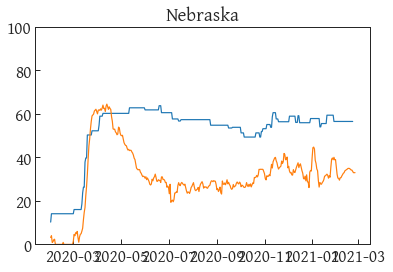

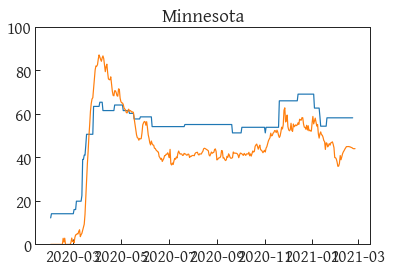

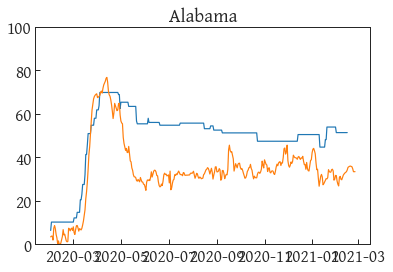

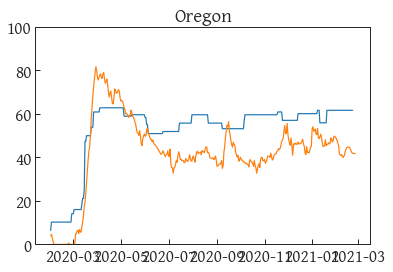

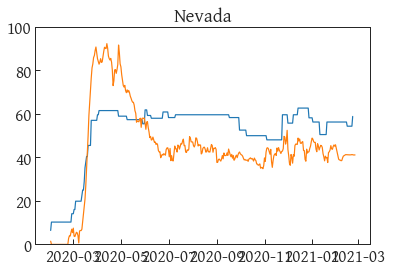

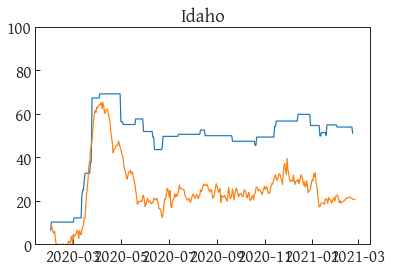

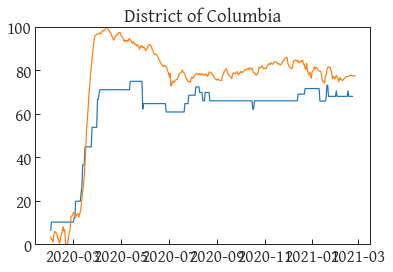

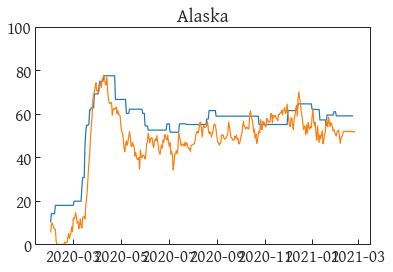

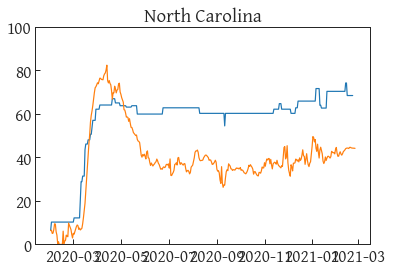

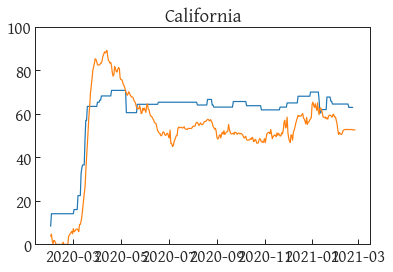

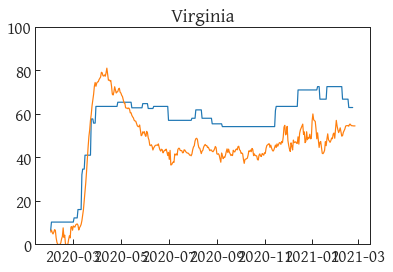

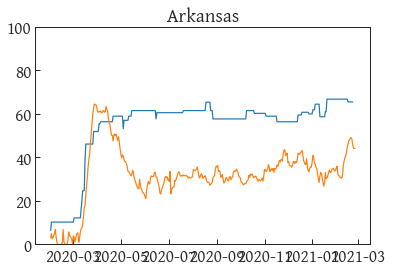

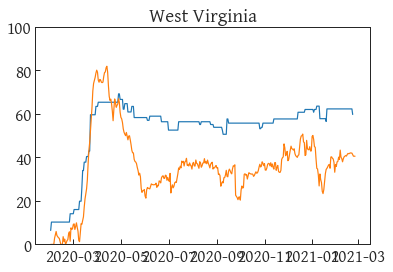

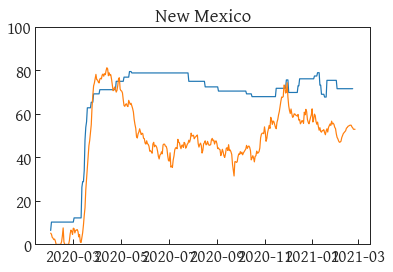

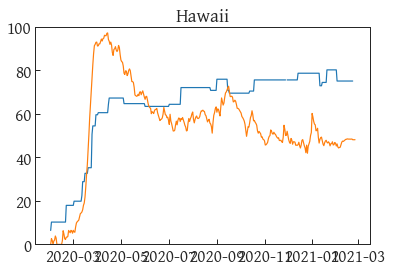

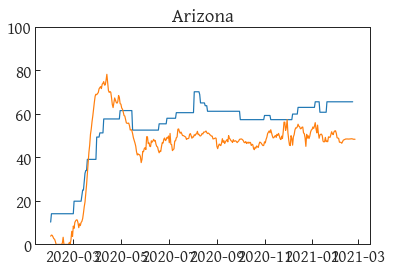

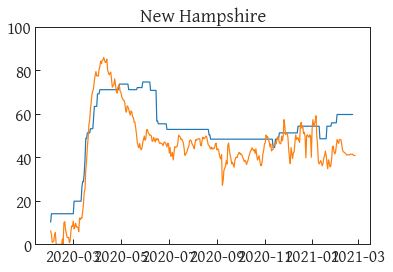

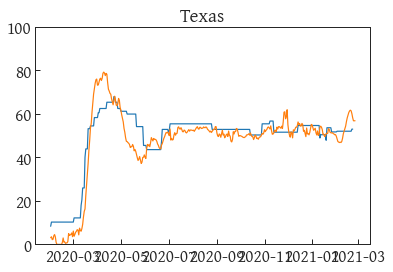

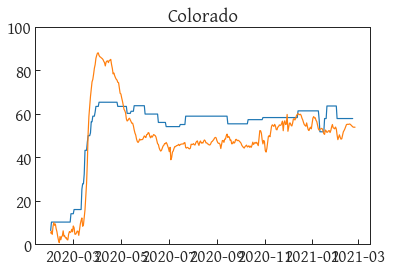

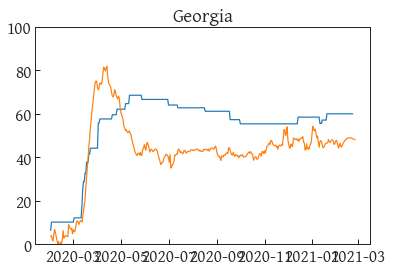

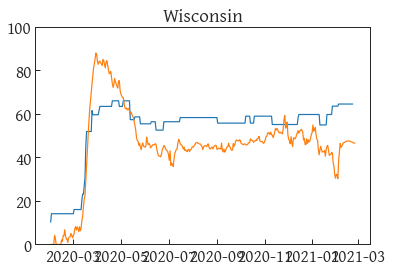

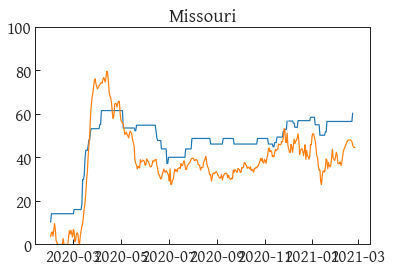

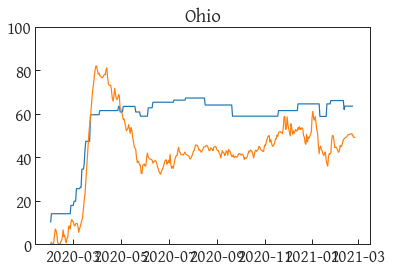

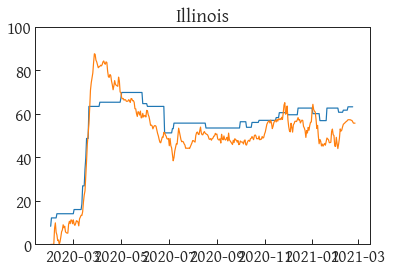

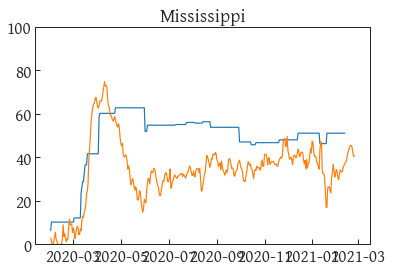

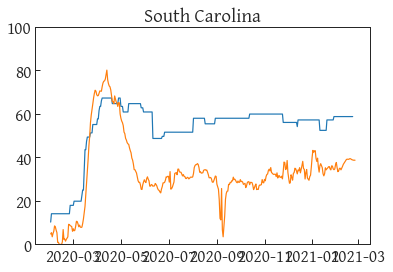

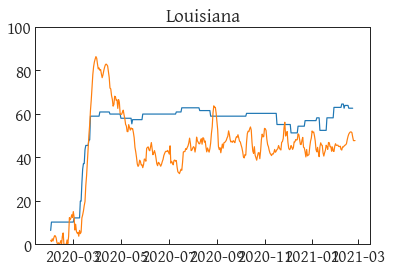

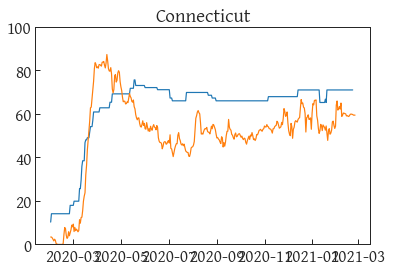

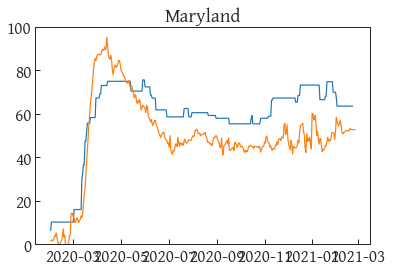

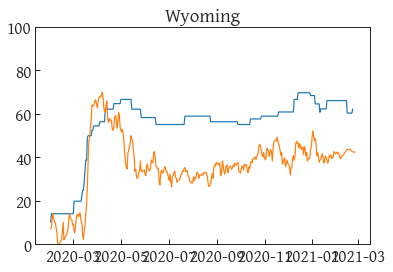

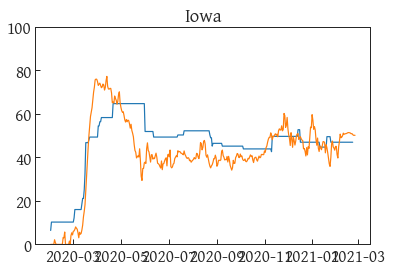

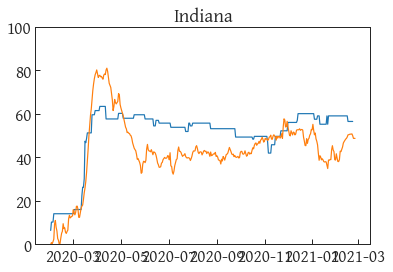

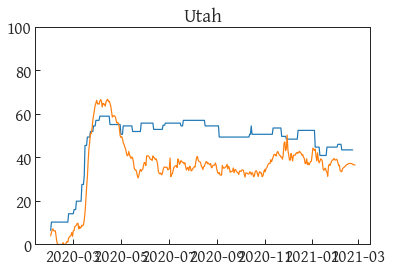

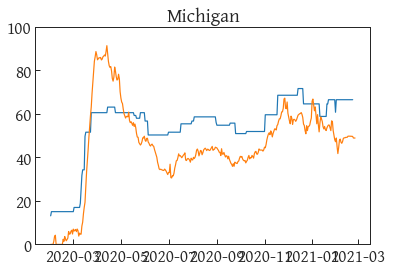

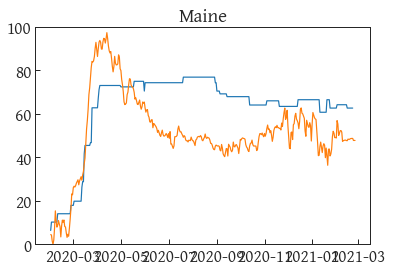

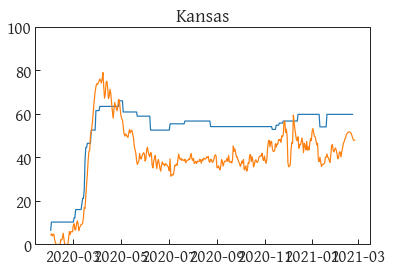

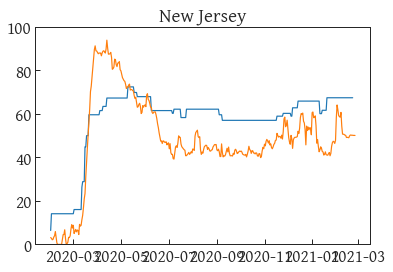

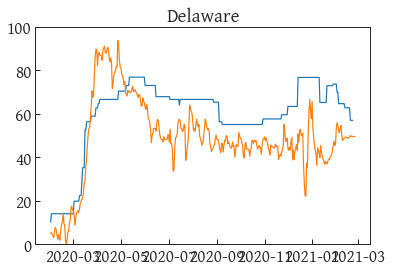

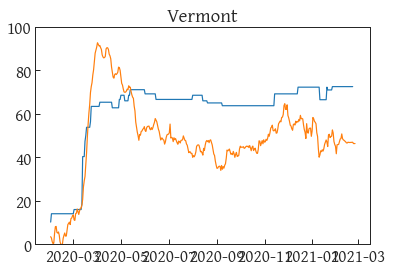

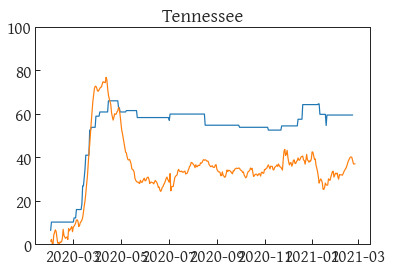

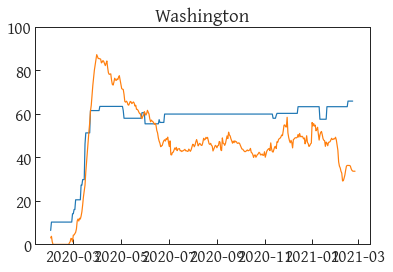

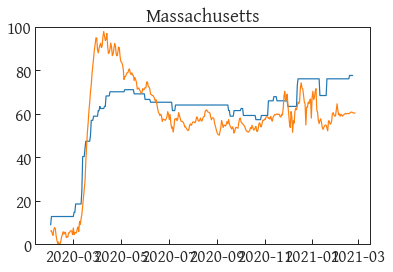

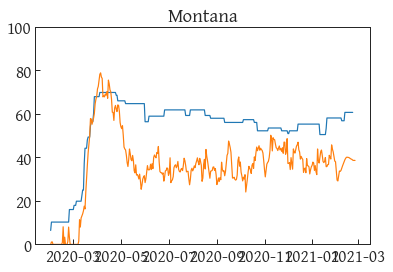

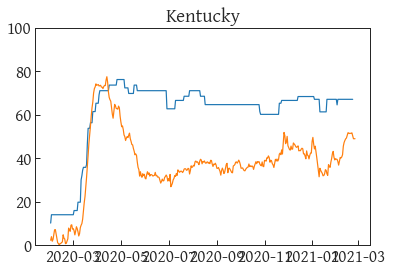

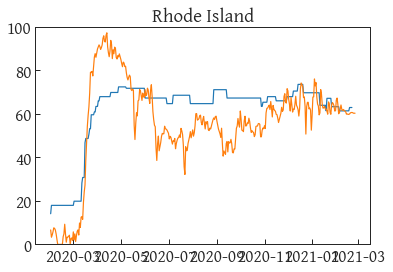

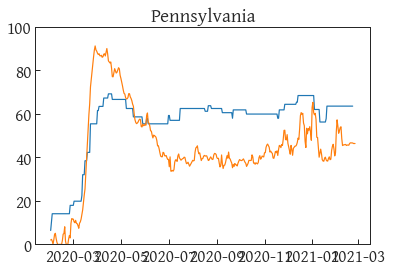

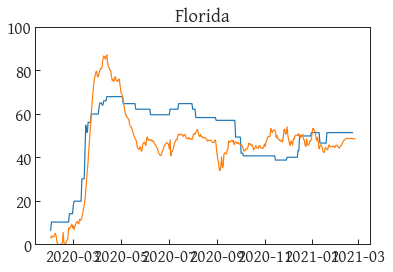

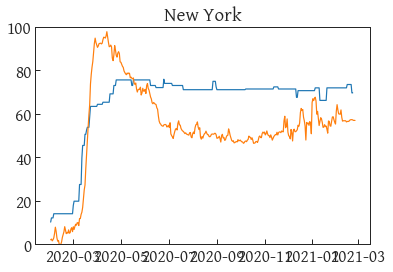

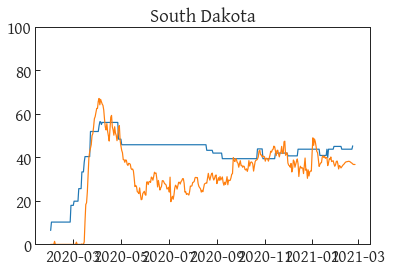

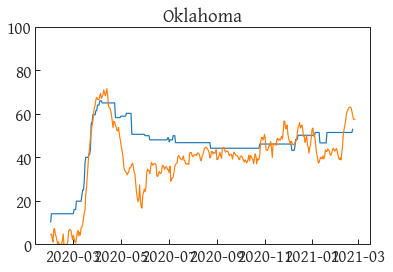

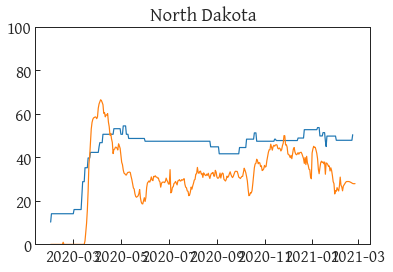

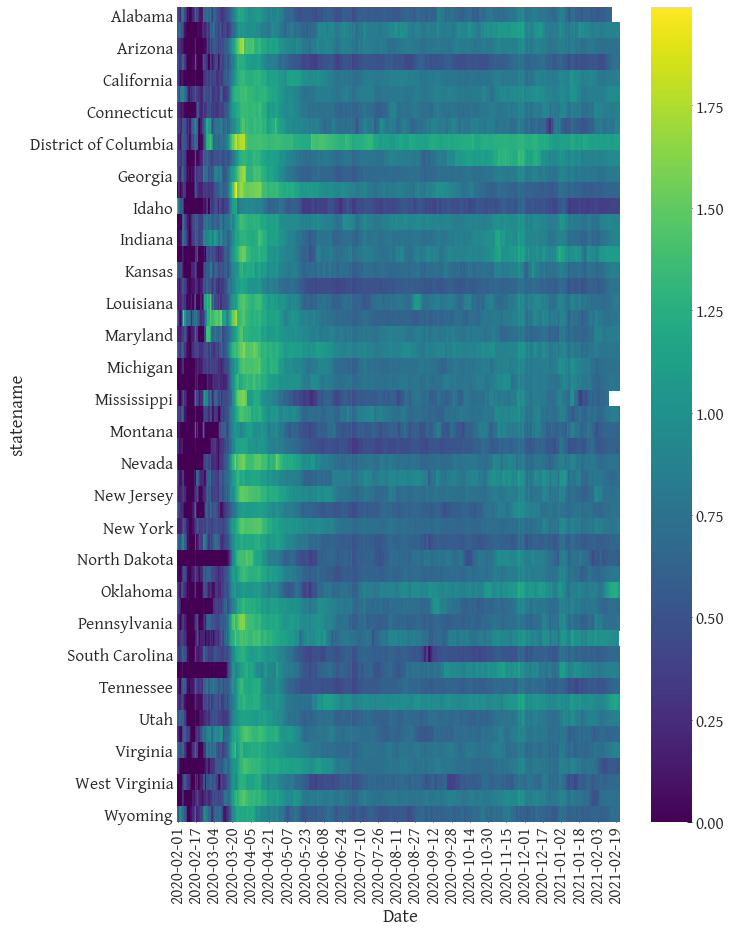

In [5]:
### READY FOR FINAL PLOT @Sheridan Green
# If we want to use any of the state-level Containment x SDI plots, they're all here (maybe Florida, California, and South Carolina again, and refer them to the website if they want to look at more?)

for state in merged['statename'].value_counts().index:
  state_dat = merged.loc[merged['statename']==state]
  plt.figure()
  plt.plot(pd.to_datetime(state_dat['Date']), state_dat[['ContainmentHealthIndex', 'shadow_index_normalized']])
  plt.ylim(0,100)
  plt.title(state)

merged['adherence_ratio'] = merged['shadow_index_normalized'] / merged['ContainmentHealthIndex']
fig,ax = plt.subplots(figsize=(10, 15))
sns.heatmap(merged.groupby(['statename', 'Date'])['adherence_ratio'].mean().unstack(), 
            cmap='viridis', ax=ax)


In [6]:
# Look at adherence by a bunch of different groups
print(merged.columns)
merged['Date_clean'] = pd.to_datetime(merged['Date'])
merged['high_mobility'] = merged['1980_mobility'].apply(lambda x: x > merged['1980_mobility'].median())
merged['partyx2'] = merged['Governor_Party'] + merged['Vote_Party']


Index(['Unnamed: 0', 'statename', 'Date', 'StringencyIndex',
       'ContainmentHealthIndex', 'statefips', 'stateabbrev',
       'shadow_index_normalized', 'state_pop2019', 'Governor_info',
       'Governor_name', 'Governor_Party', 'Vote_info', 'Vote_Party',
       'ARS_Info', 'ARS_Info_Code', 'ARS_Region', 'ARS_Division',
       'Mobility_FIPS', 'Mobility_info', '1980_mobility', 'adherence_ratio'],
      dtype='object')


In [ ]:
fix,axs = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=merged, x='Date_clean', y='adherence_ratio', hue='Governor_Party', ax=axs[0])
sns.lineplot(data=merged, x='Date_clean', y='shadow_index_normalized', hue='Governor_Party', ax=axs[1])

fix,axs = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=merged, x='Date_clean', y='adherence_ratio', hue='Vote_Party', ax=axs[0])
sns.lineplot(data=merged, x='Date_clean', y='shadow_index_normalized', hue='Vote_Party', ax=axs[1])

fix,axs = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=merged, x='Date_clean', y='adherence_ratio', hue='ARS_Region', ax=axs[0])
sns.lineplot(data=merged, x='Date_clean', y='shadow_index_normalized', hue='ARS_Region', ax=axs[1])

fix,axs = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=merged, x='Date_clean', y='adherence_ratio', hue='high_mobility', ax=axs[0])
sns.lineplot(data=merged, x='Date_clean', y='shadow_index_normalized', hue='high_mobility', ax=axs[1])

fix,axs = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=merged, x='Date_clean', y='adherence_ratio', hue='partyx2', ax=axs[0])
sns.lineplot(data=merged, x='Date_clean', y='shadow_index_normalized', hue='partyx2', ax=axs[1])


    ContainmentChange  14DayRollingContainmentChange
0                 NaN                           3.85
1                3.84                           3.85
2                0.00                           3.85
3                0.00                           3.85
4                0.00                           3.85
5                0.00                           3.85
6                3.85                           3.85
7                0.00                           3.85
8                0.00                           3.85
9                0.00                           3.85
10               0.00                           3.85
11               0.00                           3.85
12               0.00                           3.85
13               0.00                           3.85
14               0.00                           0.00
15               0.00                           0.00
16               0.00                           0.00
17               0.00                         

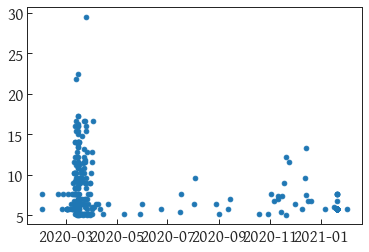

In [7]:
## Impulse response to an increase in restrictions
merged['ContainmentChange'] = merged.groupby('statefips')['ContainmentHealthIndex'].diff()
merged['14DayRollingContainmentChange'] = merged.groupby('statefips')['ContainmentChange'].apply(lambda x: x.rolling(14, center=True, min_periods=1).max())
print(merged[['ContainmentChange', '14DayRollingContainmentChange']].head(50))
plt.scatter(pd.to_datetime(merged.loc[merged['ContainmentChange'] >= 5, 'Date']), merged.loc[merged['ContainmentChange'] >= 5, 'ContainmentChange'])

# Add in indicator for high vs. low max containment states
merged['max_containment'] = merged.groupby('statefips')['ContainmentHealthIndex'].transform(max)
median_max_containment = merged['max_containment'].median()
print('Median max: ', median_max_containment)
merged['high_containment'] = merged['max_containment'] > median_max_containment
print(merged['max_containment'].describe())
print(merged['high_containment'].value_counts())
print(merged.groupby('statename')['high_containment'].sum())

In [8]:
## Create changes in Social Distancing Index around containment changes
lag_low = -12
lag_high = 30
change_vars = []
for t in range(lag_low, lag_high):
  merged['shadow_index_lag_' + str(t)] = merged.groupby('statefips')['shadow_index_normalized'].shift(-t)
  merged['change_shadow_index_lag_' + str(t)] = merged['shadow_index_lag_' + str(t)] - merged['shadow_index_normalized']
  change_vars += ['change_shadow_index_lag_' + str(t)]

state_char_keep = ['Governor_Party', 'Vote_Party', 'ARS_Region', 'high_mobility', 'partyx2']

id_keep = ['statename', 'Date', 'statefips', 'ContainmentHealthIndex', 'ContainmentChange', '14DayRollingContainmentChange', 'high_containment'] + state_char_keep
merged_event = merged[id_keep + change_vars]
merged_event_long = pd.melt(merged_event, id_vars=id_keep, value_name='lagged_shadow_index')
merged_event_long['lag'] = merged_event_long['variable'].str.slice(start=len('change_shadow_index_lag_')).astype(int)

merged_event_long['policy_incr_in_window'] = (merged_event_long['14DayRollingContainmentChange'] > 5).astype(int)
unchanged_mean = merged_event_long.groupby(['Date', 'lag', 'policy_incr_in_window'])['lagged_shadow_index'].mean().unstack()[0].rename('avg_fixedpolicy_index_change')
if 'avg_fixedpolicy_index_change' not in merged_event_long.columns:
  merged_event_long = merged_event_long.merge(unchanged_mean, on=['Date', 'lag'], indicator='_m')

merged_event_long['shadow_diff_v_mean'] = merged_event_long['lagged_shadow_index'] - merged_event_long['avg_fixedpolicy_index_change']

merged_event_long['dategroup'] = 0
merged_event_long.loc[merged_event_long['Date'] >= '2020-05-01', 'dategroup'] = 1
merged_event_long.loc[merged_event_long['Date'] >= '2020-10-01', 'dategroup'] = 2
merged_event_long.loc[merged_event_long['Date'] >= '2021-01-01', 'dategroup'] = 3

post_event
0    -4.684980
1    60.132912
Name: shadow_diff_v_mean, dtype: float64


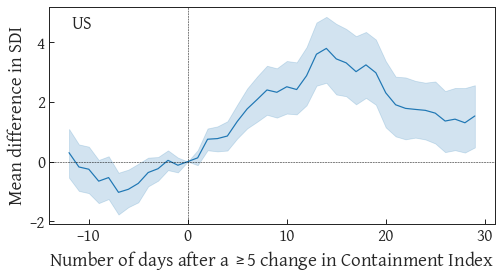

In [64]:
### READY FOR FINAL PLOT @Sheridan Green
# Impulse response to Containment increase, whole sample

containment_dates = merged_event_long.loc[merged_event_long['ContainmentChange'] >= 5]
plt.figure(figsize=(8,4))
ax = plt.gca()
sns.lineplot(data=containment_dates, x='lag', y='shadow_diff_v_mean', ci=95)
#sns.lineplot(data=containment_dates, x='lag', y='avg_fixedpolicy_index_change')
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0, ls='--', color='black', linewidth=0.5)

ax.set_xlabel(r'Number of days after a $\geq 5$ change in Containment Index')
ax.set_ylabel(r'Mean difference in SDI')

#plt.title('Impulse Response to Containment Change >=5: Whole Sample')

ax.text(0.05, 0.9, r'US', fontsize=18, transform=ax.transAxes)


plt.savefig('../figures/impulse_response_all.pdf', bbox_inches='tight')

def calculate_pre_post_effects(dat):
  event_sum = dat.groupby('lag')['shadow_diff_v_mean'].mean().reset_index()
  event_sum['post_event'] = (event_sum['lag'] >= 0).astype(int)
  return event_sum.groupby('post_event')['shadow_diff_v_mean'].sum()

effect = calculate_pre_post_effects(containment_dates)
print(effect)

In [45]:
def calculate_pre_post_effects(dat):
  event_sum = dat.groupby('lag')['shadow_diff_v_mean'].mean().reset_index()
  event_sum['post_event'] = (event_sum['lag'] >= 0).astype(int)
  return event_sum.groupby('post_event')['shadow_diff_v_mean'].mean()

def bootstrap_ses(containment_dates_selected):
  effect = calculate_pre_post_effects(containment_dates_selected)
  containment_events = containment_dates_selected.loc[containment_dates_selected['lag']==0]
  print(len(containment_events))
  pre = []
  post = []
  for t in range(1000):
    print(t)
    containment_dates_sim = None
    for i in range(len(containment_events)):
      new_event = containment_events.sample(1)
      #print(new_event['statename'].iloc[0], new_event['Date'].iloc[0])
      new_event_full = containment_dates_selected.loc[(containment_dates_selected['statename']==new_event['statename'].iloc[0]) & (containment_dates_selected['Date']==new_event['Date'].iloc[0])]
      if containment_dates_sim is None:
        containment_dates_sim = new_event_full
      else:
        containment_dates_sim = pd.concat([containment_dates_sim, new_event_full])
      #sim_draws.append(containment_dates.loc[(containment_dates['statename']==new_event['statename'].iloc[0]) & (containment_dates['Date']==new_event['Date'].iloc[0])])
      #print(len(sim_draws[-1]))
    #containment_dates_sim = pd.concat(sim_draws)
    effect_sim = calculate_pre_post_effects(containment_dates_sim)
    pre.append(effect_sim.loc[0])
    post.append(effect_sim.loc[1])
  plt.figure()
  plt.hist(pre,bins=50)
  plt.figure()
  plt.hist(post,bins=50)
  return pre,post

In [46]:
from joblib import Parallel, delayed

def bootstrap_ses(containment_dates_selected):
  effect = calculate_pre_post_effects(containment_dates_selected)
  containment_events = containment_dates_selected.loc[containment_dates_selected['lag']==0]
  print(len(containment_events))
  nrun = 1000
  def get_pre_post_parallel():
    containment_dates_sim = None
    for i in range(len(containment_events)):
      new_event = containment_events.sample(1)
      #print(new_event['statename'].iloc[0], new_event['Date'].iloc[0])
      new_event_full = containment_dates_selected.loc[(containment_dates_selected['statename']==new_event['statename'].iloc[0]) & (containment_dates_selected['Date']==new_event['Date'].iloc[0])]
      if containment_dates_sim is None:
        containment_dates_sim = new_event_full
      else:
        containment_dates_sim = pd.concat([containment_dates_sim, new_event_full])
      #sim_draws.append(containment_dates.loc[(containment_dates['statename']==new_event['statename'].iloc[0]) & (containment_dates['Date']==new_event['Date'].iloc[0])])
      #print(len(sim_draws[-1]))
    #containment_dates_sim = pd.concat(sim_draws)
    effect_sim = calculate_pre_post_effects(containment_dates_sim)
    return effect_sim #.loc[0], effect_sim.loc[1]
  res = Parallel(n_jobs=11)(delayed(get_pre_post_parallel)() for t in range(nrun))
  pre = [res[i].loc[0] for i in range(nrun)]
  post = [res[i].loc[1] for i in range(nrun)]
  plt.figure()
  plt.hist(pre,bins=50)
  plt.figure()
  plt.hist(post,bins=50)
  return pre,post

In [47]:
containment_dates_0 = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([0]))]
containment_dates_1 = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([1]))]
containment_dates_2 = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([2]))]
containment_dates_3 = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([3]))]

257


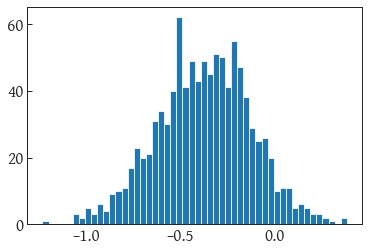

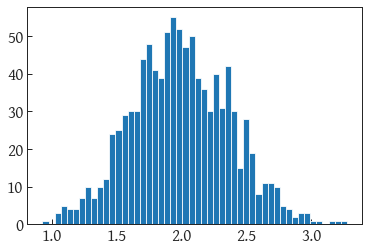

In [48]:
pre_all,post_all = bootstrap_ses(containment_dates)

192


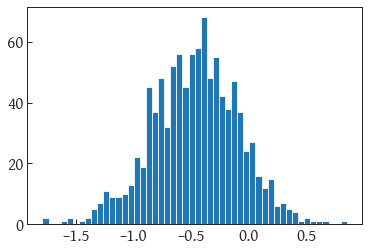

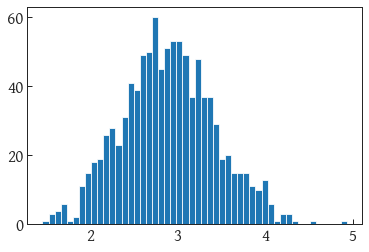

In [49]:
pre_0,post_0 = bootstrap_ses(containment_dates_0)

12


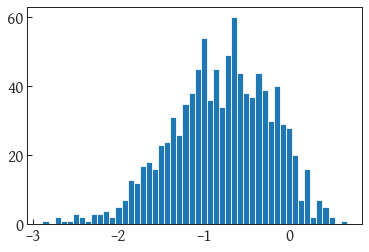

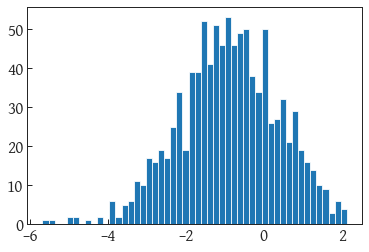

In [50]:
pre_1,post_1 = bootstrap_ses(containment_dates_1)

19


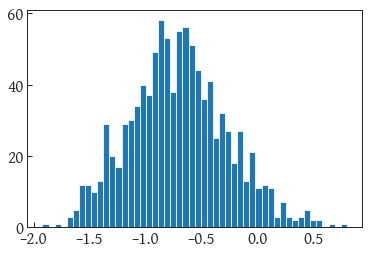

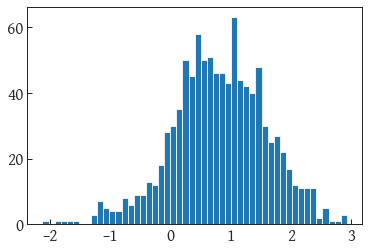

In [51]:
pre_2,post_2 = bootstrap_ses(containment_dates_2)

34


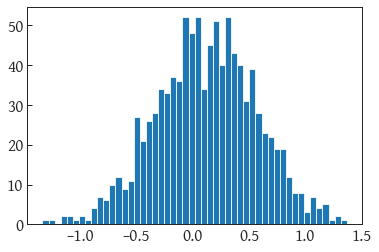

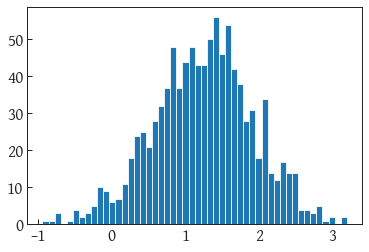

In [52]:
pre_3,post_3 = bootstrap_ses(containment_dates_3)

In [53]:
data_subsets = [containment_dates, containment_dates_0, containment_dates_1, containment_dates_2, containment_dates_3]
pre_hist = [pre_all, pre_0, pre_1, pre_2, pre_3]
post_hist = [post_all, post_0, post_1, post_2, post_3]

impulse_res_results_df = pd.DataFrame({
    'pre_effect' : [calculate_pre_post_effects(d).loc[0] for d in data_subsets],
    'post_effect' : [calculate_pre_post_effects(d).loc[1] for d in data_subsets],
    'pre_ci95_lower' : [np.quantile(d_pre, 0.05) for d_pre in pre_hist],
    'pre_ci95_upper' : [np.quantile(d_pre, 0.95) for d_pre in pre_hist],
    'post_ci95_lower' : [np.quantile(d_post, 0.05) for d_post in post_hist],
    'post_ci95_upper' : [np.quantile(d_post, 0.95) for d_post in post_hist],
})

print(impulse_res_results_df)

   pre_effect  post_effect  pre_ci95_lower  pre_ci95_upper  post_ci95_lower  \
0   -0.390415     2.004430       -0.797767        0.021055         1.391704   
1   -0.463974     2.903214       -1.102274        0.128574         2.030074   
2   -0.790296    -0.956885       -1.808152        0.076626        -3.006749   
3   -0.705278     0.829817       -1.409880        0.044333        -0.526425   
4    0.121146     1.265794       -0.622812        0.829073         0.125978   

   post_ci95_upper  
0         2.631217  
1         3.816221  
2         1.163972  
3         2.050389  
4         2.360833  


In [ ]:
## Create changes in Social Distancing Index around containment changes
lag_low = -7
lag_high = 21
change_vars = []
for t in range(lag_low, lag_high):
  merged['shadow_index_lag_' + str(t)] = merged.groupby('statefips')['shadow_index_normalized'].shift(-t)
  merged['change_shadow_index_lag_' + str(t)] = (merged['shadow_index_lag_' + str(t)] - merged['shadow_index_normalized'])/(1 + merged['shadow_index_normalized'])
  change_vars += ['change_shadow_index_lag_' + str(t)]

id_keep = ['statename', 'Date', 'statefips', 'ContainmentHealthIndex', 'ContainmentChange', 'high_containment']
merged_event = merged[id_keep + change_vars]
merged_event_long = pd.melt(merged_event, id_vars=id_keep, value_name='lagged_shadow_index')
merged_event_long['lag'] = merged_event_long['variable'].str.slice(start=len('change_shadow_index_lag_')).astype(int)

merged_event_long['dategroup'] = 0
merged_event_long.loc[merged_event_long['Date'] >= '2020-05-01', 'dategroup'] = 1
merged_event_long.loc[merged_event_long['Date'] >= '2020-10-01', 'dategroup'] = 2
merged_event_long.loc[merged_event_long['Date'] >= '2021-01-01', 'dategroup'] = 3

merged_event_long['perc_change_containment'] = merged_event_long['ContainmentChange'] / merged_event_long['ContainmentHealthIndex']
merged_event_long['lagged_shadow_index_elasticity'] = merged_event_long['lagged_shadow_index'] / merged_event_long['perc_change_containment'].apply(abs)

containment_dates = merged_event_long.loc[merged_event_long['perc_change_containment'] >= 0.05]
plt.figure()
sns.lineplot(data=containment_dates, x='lag', y='avg_shadow_index_change')
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0, ls='--', color='black', linewidth=0.5)

containment_dates = merged_event_long.loc[(merged_event_long['perc_change_containment'] >= 0.1) & (merged_event_long['Date'] > '2020-08-01')]
plt.figure()
sns.lineplot(data=containment_dates, x='lag', y='avg_shadow_index_change')
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0, ls='--', color='black', linewidth=0.5)

containment_dates = merged_event_long.loc[(merged_event_long['perc_change_containment'] <= -0.05) & (merged_event_long['Date'] > '2020-08-01')]
plt.figure()
sns.lineplot(data=containment_dates, x='lag', y='avg_shadow_index_change')
plt.axvline(0, ls='--', color='black', linewidth=0.5)
plt.axhline(0, ls='--', color='black', linewidth=0.5)


<ipython-input-55-ba5015673c58>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


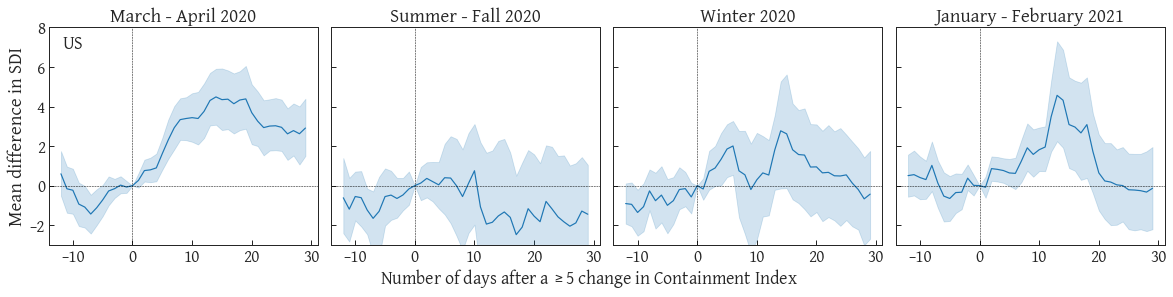

In [55]:
### READY FOR FINAL PLOT @Sheridan Green
# Impulse response to Containment increase, broken by wave

fig,axs = plt.subplots(1, 4, figsize=(20,4), sharex=True, sharey=True, gridspec_kw={'wspace':0.05})

containment_dates = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([0]))]
sns.lineplot(data=containment_dates, x='lag', y='shadow_diff_v_mean', ax=axs[0])
axs[0].set_title(r'March - April 2020')

containment_dates = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([1]))]
sns.lineplot(data=containment_dates, x='lag', y='shadow_diff_v_mean', ax=axs[1])
axs[1].set_title(r'Summer - Fall 2020')

containment_dates = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([2]))]
sns.lineplot(data=containment_dates, x='lag', y='shadow_diff_v_mean', ax=axs[2])
axs[2].set_title('Winter 2020')

containment_dates = merged_event_long.loc[(merged_event_long['ContainmentChange'] >= 5) & (merged_event_long['dategroup'].isin([3]))]
sns.lineplot(data=containment_dates, x='lag', y='shadow_diff_v_mean', ax=axs[3])
axs[3].set_title('January - February 2021')

for ax in axs:
  ax.axvline(0, ls='--', color='black', linewidth=0.5)
  ax.axhline(0, ls='--', color='black', linewidth=0.5)
  ax.set_ylim(-3,8)

#ax[0].set_xlabel(r'Number of days after a $\geq 5$ change in containment')
axs[0].set_ylabel(r'Mean difference in SDI')
for i in range(1,4):
    axs[i].set_ylabel('')
    
for i in range(0,4):
    axs[i].set_xlabel('')

axs[0].text(0.05, 0.9, r'US', fontsize=18, transform=axs[0].transAxes)
fig.text(0.5, -0.01, r'Number of days after a $\geq 5$ change in Containment Index', ha='center', fontsize=18)

#plt.title('Impulse Response to Containment Change >=5: Whole Sample')

plt.savefig('../figures/impulse_response_date.pdf', bbox_inches='tight')

plt.tight_layout()

In [ ]:
print(merged_event_long.loc[merged_event_long['ContainmentChange'] >= 5])

            statename        Date  ...  shadow_diff_v_mean  dategroup
55         California  2020-02-02  ...                 NaN          0
82         New Jersey  2020-02-02  ...                 NaN          0
1031           Hawaii  2020-02-21  ...           -3.831828          0
1250          Montana  2020-02-25  ...            1.633468          0
1367     South Dakota  2020-02-27  ...            5.510476          0
...               ...         ...  ...                 ...        ...
835680       Virginia  2021-01-20  ...            1.441647          3
835681        Vermont  2021-01-20  ...           -5.468580          3
835682     Washington  2021-01-20  ...          -15.540168          3
835684  West Virginia  2021-01-20  ...            1.584064          3
836269       Michigan  2021-02-01  ...                 NaN          3

[10794 rows x 20 columns]
